In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from tqdm import tqdm

In [3]:
n = 3
a = 5
s = 5
gamma = 0.8

A = a**n

In [100]:
result = []
N = 1000
for test in tqdm(range(N)):



    Q = np.random.randint(0, 2, size=(A))

    dist1 = np.random.uniform(0, 1, size=(n,a))
    dist2 = np.random.uniform(0, 1, size=(n,a))
    for i in range(n):
        dist1[i,:] = dist1[i,:]/np.sum(dist1[i,:])
        dist2[i,:] = dist2[i,:]/np.sum(dist2[i,:])

    delta = 0.1

    pi_1 = np.copy(dist1)
    pi_2 = dist1 *(1-delta)+dist2*delta

    weighted_sum = 0
    for global_action in range(A):
        prob1 = 1
        prob2 = 1
        temp = global_action
        for agent in range(n):
            local_action = temp%a
            temp = int(temp/a)
            prob1 *= pi_1[agent,local_action]
            prob2 *= pi_2[agent,local_action]
#         print(prob1-prob2)
#         print(global_action)
#         print(Q[global_action])
#         print((prob1-prob2)*Q[global_action])
        weighted_sum += (prob1-prob2)*Q[global_action]
    result.append(weighted_sum)
#     print(weighted_sum)
# np.array(result)
# plt.plot(result/(2*delta))

100%|██████████| 1000/1000 [00:00<00:00, 1459.53it/s]


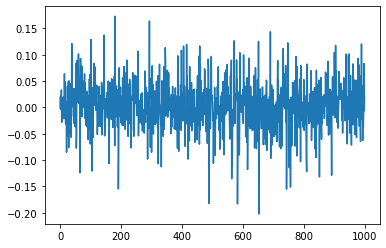

In [102]:
plt.plot(np.array(result)/(2*delta))

# plt.plot(np.array(result))

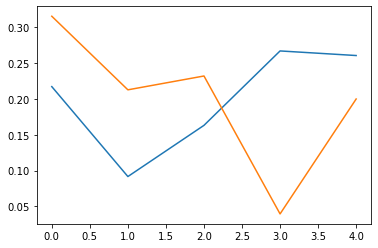

In [74]:
plt.plot(dist1[0])

plt.plot(dist2[0])



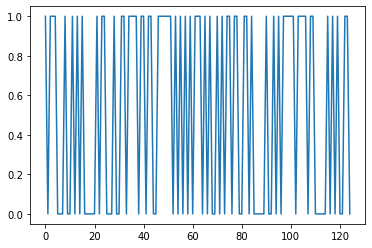

In [76]:
plt.plot(Q)

In [9]:
N = 10000

rho = 0.96
delta = 0.01
x = np.zeros(N)
base = np.zeros(N)
x[0] = 10000
for i in range(1,N):
    base[i] = i
    x[i] = rho*x[i-1] + delta*np.sqrt(x[i-1])

In [6]:
a = 10

r = np.random.uniform(0,1,a)
r = r-np.mean(r)
print(r)

tau = 10

kappa = 0.01

pi = np.random.uniform(0,1,a)
pi = pi/np.sum(pi)

pi_1 = pi*np.exp(r/tau)
pi_1 = pi_1/np.sum(pi_1)


pi_2 = pi*np.exp(r/kappa)
pi_2 = pi_2/np.sum(pi_2)

print(np.dot(pi_1-pi, r))
print(np.dot(pi_2-pi, r))


[-0.29430348 -0.50288416  0.32122008  0.32072003  0.11244652 -0.4095287
  0.03956427  0.14811248  0.080165    0.18448798]
0.00197567184034531
0.18170788967132553


In [173]:
a=5

r = np.random.uniform(0,2,a)
# r = r-np.mean(r)
print(r)

pi = np.random.uniform(0,1,a)
pi = pi/np.sum(pi)

In [179]:
for j in range(1):
    factors = []
    vals = []
    r_max = 0.9
#     r = np.random.randint(0,2,a)
#     r = r-np.mean(r)
#     print(r)

#     pi = np.random.uniform(0,1,a)
#     pi = pi/np.sum(pi)
    for i in range(105):
        factor = 0.01*10000**(0.01*i)
        factors.append(factor)
        pi_1 = pi*np.exp(r_max*r*factor)
        pi_1 = pi_1/np.sum(pi_1)

    #     print(pi_1)
        val = (np.dot(pi_1-pi, r_max*r))
        vals.append(val)
    factors = np.array(factors)
    vals = np.array(vals)
    #     print(factor, val)
    print(np.max(vals-factors))
    

-0.007588707708284512


-0.007588707708284512


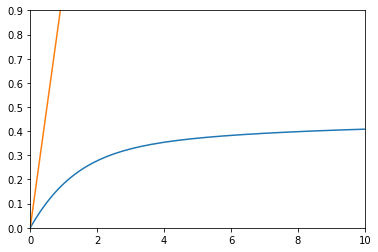

In [183]:


plt.plot(factors, vals)

plt.plot(factors, np.minimum(factors,np.max(r)))
# plt.plot(factors, factors**2)

plt.ylim(0,r_max)

plt.xlim(0,10)

print(np.max(vals-np.minimum(factors,np.max(r))))

-0.0037421435026903584


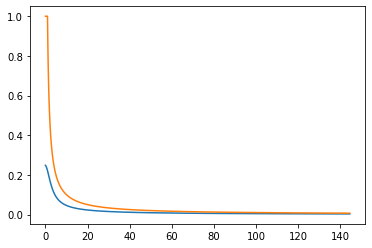

In [128]:
plt.plot(factors,vals/factors)
plt.plot(factors,np.minimum(1,1/factors))
print(np.max(vals/factors-np.minimum(1,1/factors)))